In [72]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import pickle

fn = '/home/maxwshen/piu-annotate/artifacts/difficulty/datasets/112324.pkl'
with open(fn, 'rb') as f:
    dataset = pickle.load(f)

In [73]:
"""
    EDA of 112324.pkl, which is features and difficulty level labels
    for entire stepcharts. Features are built as:
    
    times = np.array(cs.df['Time'])

    event_times = {
        'edp': calc_effective_downpress_times(cs),
        'bracket': times[cs.df['__bracket']],
        'twist90': times[cs.df['__twist 90']],
        'twistover90': times[cs.df['__twist over90']],
    }
    fts = dict()
    for event, times in event_times.items():
        for t in [5, 10, 30, 45]:
            fts[f'{event}-{t}'] = calc_max_event_frequency(times, t)
    
    x = np.array(list(fts.values()))
"""

"\n    EDA of 112324.pkl, which is features and difficulty level labels\n    for entire stepcharts. Features are built as:\n    \n    times = np.array(cs.df['Time'])\n\n    event_times = {\n        'edp': calc_effective_downpress_times(cs),\n        'bracket': times[cs.df['__bracket']],\n        'twist90': times[cs.df['__twist 90']],\n        'twistover90': times[cs.df['__twist over90']],\n    }\n    fts = dict()\n    for event, times in event_times.items():\n        for t in [5, 10, 30, 45]:\n            fts[f'{event}-{t}'] = calc_max_event_frequency(times, t)\n    \n    x = np.array(list(fts.values()))\n"

In [74]:
events = ['edp', 'bracket', 'twist90', 'twistover90']
ts = [5, 10, 30, 45]
ft_names = [f'{e}-{t}' for e in events for t in ts]
print(ft_names)

['edp-5', 'edp-10', 'edp-30', 'edp-45', 'bracket-5', 'bracket-10', 'bracket-30', 'bracket-45', 'twist90-5', 'twist90-10', 'twist90-30', 'twist90-45', 'twistover90-5', 'twistover90-10', 'twistover90-30', 'twistover90-45']


In [75]:
x = dataset['x']
print(x.shape)

y = dataset['y']
print(y.shape)

(3836, 16)
(3836,)


In [86]:
df = pd.DataFrame(x, columns = ft_names)
df['level'] = y
df['file'] = dataset['files']
df['sord'] = dataset['singles_or_doubles']
df

,edp-5,edp-10,edp-30,edp-45,bracket-5,bracket-10,bracket-30,bracket-45,twist90-5,twist90-10,twist90-30,twist90-45,twistover90-5,twistover90-10,twistover90-30,twistover90-45,level,file,sord
0,1.2,1.2,1.200000,1.177778,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3,Euphorianic_-_SHK_S3_ARCADE.csv,singles
1,6.2,6.2,4.900000,4.422222,0.0,0.0,0.000000,0.000000,0.4,0.2,0.066667,0.088889,0.2,0.1,0.033333,0.022222,7,Accident_-_MAX_S7_ARCADE.csv,singles
2,5.6,5.4,4.466667,4.244444,0.0,0.0,0.000000,0.000000,1.6,1.0,0.366667,0.244444,1.6,1.0,0.366667,0.333333,11,Dual_Racing_RED_vs_BLUE_-_Nato_&_r300k_S11_ARC...,singles
3,2.8,2.6,1.866667,1.711111,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4,Wedding_Crashers_-_SHORT_CUT_-_-_SHK_S4_SHORTC...,singles
4,5.2,4.7,4.333333,4.244444,0.2,0.1,0.033333,0.022222,1.6,1.3,0.800000,0.666667,1.0,0.9,0.333333,0.222222,14,With_my_Lover_-_BanYa_D14_ARCADE.csv,doubles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,7.6,7.0,6.333333,5.688889,0.0,0.0,0.000000,0.000000,1.8,1.4,0.466667,0.355556,0.8,0.5,0.200000,0.155556,14,HTTP_-_Quree_S14_ARCADE.csv,singles
3832,8.6,8.2,6.600000,5.600000,0.6,0.3,0.133333,0.088889,0.4,0.4,0.133333,0.088889,0.6,0.3,0.100000,0.066667,16,B2_-_MAX_S16_ARCADE.csv,singles
3833,10.8,9.3,7.733333,7.222222,0.8,0.6,0.200000,0.133333,3.4,3.2,1.833333,1.600000,1.6,1.6,0.566667,0.400000,20,Imperium_-_sakuzyo_D20_ARCADE.csv,doubles
3834,10.6,9.4,7.066667,6.244444,0.4,0.2,0.066667,0.066667,2.2,1.3,0.966667,0.666667,1.6,1.0,0.766667,0.511111,18,Vook_-_Banya_S18_ARCADE.csv,singles


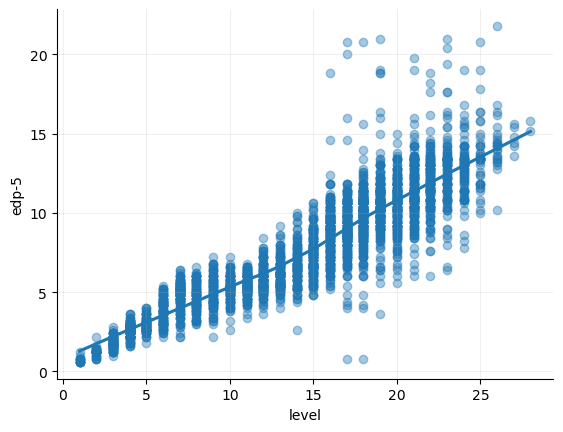

In [77]:
sns.regplot(
    data = df,
    x = 'level',
    y = 'edp-5',
    # alpha = 0.6,
    lowess = True,
    # hue = 'twist90-5',
    scatter_kws = {
        'alpha': 0.4,
    }
)
sns.despine()
plt.grid(alpha = 0.2)
# plt.xlim(left = 0, right = 25)
# plt.ylim(bottom = 0, top = 25)

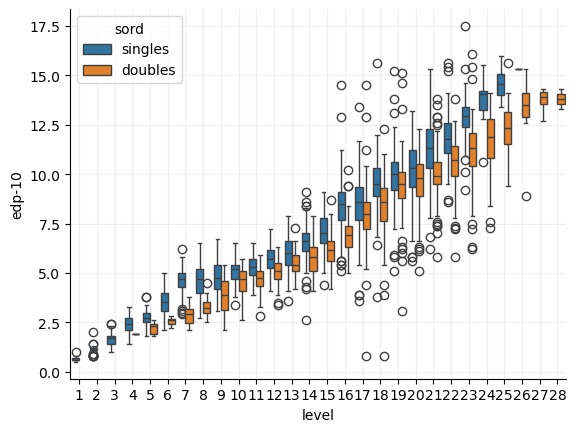

In [89]:
sns.boxplot(
    data = df,
    x = 'level',
    y = 'edp-10',
    hue = 'sord',
)
sns.despine()
plt.grid(alpha = 0.2)
# plt.xlim(left = 0, right = 25)
# plt.ylim(bottom = 0, top = 25)

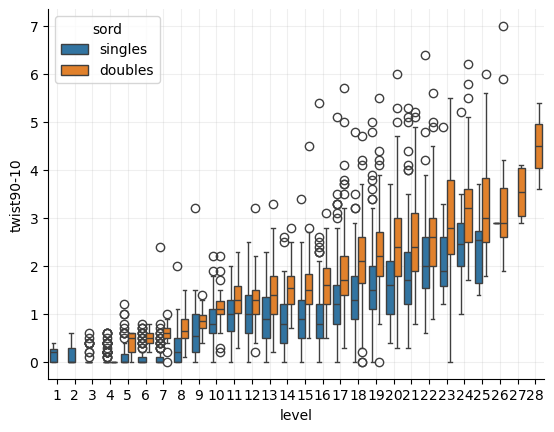

In [87]:
sns.boxplot(
    data = df,
    x = 'level',
    y = 'twist90-10',
    hue = 'sord',
)
sns.despine()
plt.grid(alpha = 0.2)
# plt.xlim(left = 0, right = 25)
# plt.ylim(bottom = 0, top = 25)

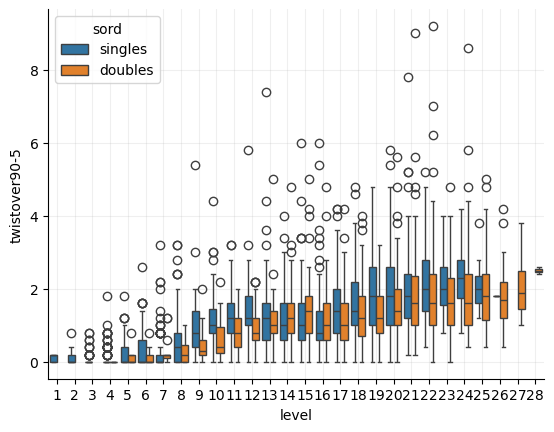

In [93]:
sns.boxplot(
    data = df,
    x = 'level',
    y = 'twistover90-5',
    hue = 'sord',
)
sns.despine()
plt.grid(alpha = 0.2)
# plt.xlim(left = 0, right = 25)
# plt.ylim(bottom = 0, top = 25)

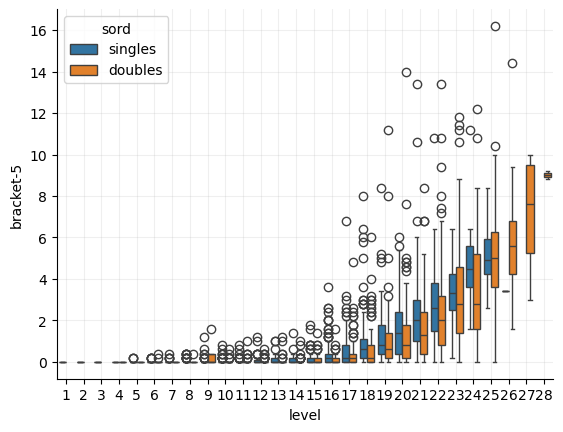

In [90]:
sns.boxplot(
    data = df,
    x = 'level',
    y = 'bracket-5',
    hue = 'sord',
)
sns.despine()
plt.grid(alpha = 0.2)
# plt.xlim(left = 0, right = 25)
# plt.ylim(bottom = 0, top = 25)

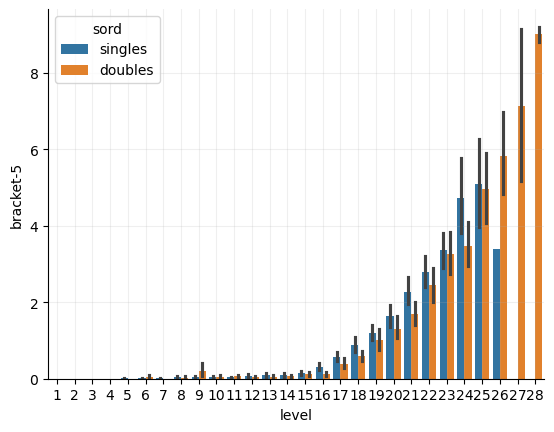

In [154]:
sns.barplot(
    data = df,
    x = 'level',
    y = 'bracket-5',
    hue = 'sord',
)
sns.despine()
plt.grid(alpha = 0.2)
# plt.xlim(left = 0, right = 25)
# plt.ylim(bottom = 0, top = 25)

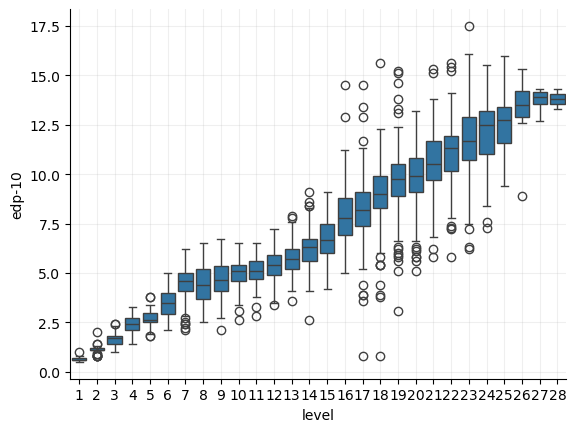

In [79]:
sns.boxplot(
    data = df,
    x = 'level',
    y = 'edp-10',
)
sns.despine()
plt.grid(alpha = 0.2)
# plt.xlim(left = 0, right = 25)
# plt.ylim(bottom = 0, top = 25)

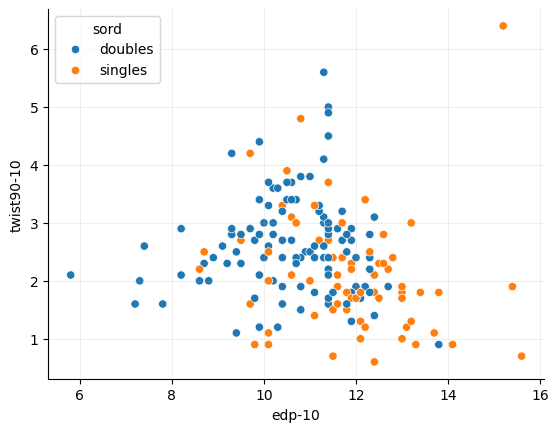

In [91]:
sns.scatterplot(
    x = 'edp-10',
    y = 'twist90-10',
    # hue = 'level',
    hue = 'sord',
    data = df[df['level'].isin([22])],
    # data = df[df['level'].isin([13, 16, 19, 22])],
)
# plt.xlim(left = 0, right = 25)
sns.despine()
plt.grid(alpha = 0.2)

In [80]:
df[df['level'].isin([22])].sort_values(by = 'edp-10')

,edp-5,edp-10,edp-30,edp-45,bracket-5,bracket-10,bracket-30,bracket-45,twist90-5,twist90-10,twist90-30,twist90-45,twistover90-5,twistover90-10,twistover90-30,twistover90-45,level,file
1339,6.0,5.8,5.066667,4.955556,3.8,3.5,2.333333,1.866667,2.2,2.1,1.366667,1.244444,0.6,0.5,0.233333,0.155556,22,Pneumonoultramicroscopicsilicovolcanoconiosis_...
2017,7.6,7.2,6.700000,5.444444,3.0,2.2,1.033333,0.777778,2.0,1.6,0.866667,0.622222,0.8,0.4,0.200000,0.155556,22,The_End_of_the_World_ft._Skizzo_-_MonstDeath_D...
37,7.6,7.3,6.566667,5.955556,4.0,3.2,2.600000,2.066667,2.2,2.0,1.766667,1.466667,3.2,1.8,0.900000,0.688889,22,Showdown_-_litmus*_D22_ARCADE.csv
111,8.4,7.4,5.566667,4.777778,3.2,2.5,1.600000,1.622222,3.2,2.6,1.766667,1.533333,1.8,1.4,0.900000,0.711111,22,TOMBOY_-_(G)I-DLE_D22_ARCADE.csv
1877,9.0,7.8,6.966667,6.288889,1.0,0.7,0.433333,0.377778,2.8,1.6,1.033333,0.911111,1.8,1.1,0.900000,0.733333,22,Slam_-_Novasonic_D22_ARCADE.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,14.2,13.8,9.466667,8.844444,1.0,0.8,0.400000,0.333333,2.2,1.8,0.900000,0.666667,1.4,1.1,0.466667,0.355556,22,CROSS_OVER_feat._LyuU_-_HyuN_S22_ARCADE.csv
2161,14.2,14.1,11.200000,9.444444,4.6,4.3,1.666667,1.155556,1.0,0.9,0.433333,0.355556,0.6,0.5,0.266667,0.200000,22,Neo_Catharsis_-_TAG_underground_overlay_S22_AR...
3694,18.8,15.2,11.700000,9.911111,1.6,0.8,0.266667,0.177778,8.0,6.4,3.433333,2.688889,5.2,3.3,1.933333,1.600000,22,Phantom_-Intermezzo-_-_Banya_Production_S22_AR...
2655,17.6,15.4,11.766667,10.177778,2.6,2.3,1.466667,1.488889,2.2,1.9,1.233333,1.000000,1.2,0.9,0.600000,0.511111,22,Clematis_Rapsodia_-_Jehezukiel_S22_ARCADE.csv


<Axes: xlabel='edp-10', ylabel='edp-30'>

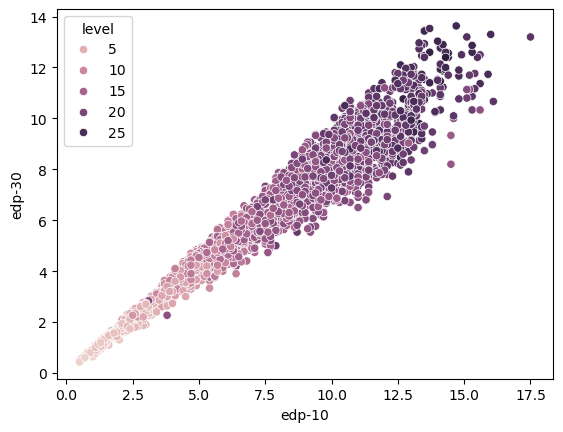

In [81]:
sns.scatterplot(
    x = 'edp-10',
    y = 'edp-30',
    hue = 'level',
    data = df,
)

In [82]:
df.sort_values(by = 'edp-5', ascending = False)

,edp-5,edp-10,edp-30,edp-45,bracket-5,bracket-10,bracket-30,bracket-45,twist90-5,twist90-10,twist90-30,twist90-45,twistover90-5,twistover90-10,twistover90-30,twistover90-45,level,file
2712,21.8,14.7,13.633333,12.533333,8.8,6.2,2.600000,1.955556,10.0,7.0,2.833333,2.666667,0.8,0.4,0.266667,0.244444,26,Shub_Niggurath_-_Nato_D26_ARCADE.csv
429,21.0,11.4,7.366667,5.733333,11.2,5.7,2.266667,2.022222,3.8,2.9,1.366667,1.066667,0.8,0.4,0.133333,0.111111,23,Altale_-_sakuzyo_D23_ARCADE.csv
1883,21.0,11.3,6.800000,5.311111,11.2,5.8,2.166667,1.888889,4.4,3.3,1.500000,1.288889,0.4,0.2,0.066667,0.044444,19,Altale_-_sakuzyo_D19_ARCADE.csv
471,20.8,15.6,11.366667,10.111111,16.2,8.1,3.266667,2.355556,9.0,5.0,2.600000,2.088889,1.2,1.1,0.566667,0.422222,25,Will-O-The-Wisp_-_BanYa_D25_ARCADE.csv
3748,20.8,15.6,10.333333,9.555556,0.2,0.1,0.033333,0.022222,1.6,1.0,0.800000,0.622222,1.4,1.0,0.533333,0.488889,18,VVV_-_ZiGZaG_S18_ARCADE.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,0.6,0.6,0.533333,0.511111,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1,Airplane_-_TYPHOON_S1_ARCADE.csv
2168,0.6,0.6,0.600000,0.555556,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1,Mitotsudaira_-_ETIA._S1_ARCADE.csv
2879,0.6,0.6,0.600000,0.577778,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1,You_again_my_love_-_CYO_Style_&_Henohenomoheji...
2185,0.6,0.6,0.533333,0.533333,0.0,0.0,0.000000,0.000000,0.4,0.3,0.133333,0.133333,0.2,0.2,0.066667,0.066667,1,After_LIKE_-_IVE_S1_ARCADE.csv


### plot progression

In [ ]:
pdf.loc[(pdf['level'] == 9) & (pdf['sord'] == 'doubles')]['edp-5'] -= 0.001

,level,sord,twistscore-5,edp-5
13,9,doubles,2.0,4.3


/tmp/ipykernel_17644/2563569537.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


Text(70.97222222222221, 0.5, 'Twist score (highest value in any 5-second window')

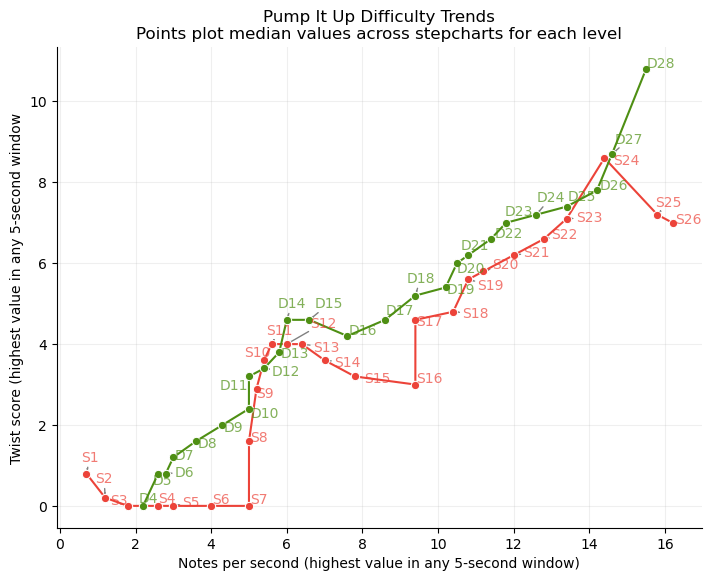

In [146]:
df['twistscore-5'] = df['twist90-5'] + 2 * df['twistover90-5']

gdf = df.groupby(['level', 'sord'])[['twistscore-5', 'edp-5']].agg('median').reset_index()

from adjustText import adjust_text

fig, ax = plt.subplots(figsize = (6.4 * 1.3, 4.8 * 1.3))

# pdf = gdf[gdf['sord'] == 'singles']
pdf = gdf.copy()

# fix points with same x axis value
pdf.loc[(pdf['level'] == 8) & (pdf['sord'] == 'singles'), 'edp-5'] += 0.001
pdf.loc[(pdf['level'] == 10) & (pdf['sord'] == 'doubles'), 'edp-5'] -= 0.001
pdf.loc[(pdf['level'] == 17) & (pdf['sord'] == 'singles'), 'edp-5'] += 0.001

palette = {
    'singles': '#ec4339',
    'doubles': '#4e8f13',
}

# sns.scatterplot(
#     data = pdf,
#     x = (x := 'edp-5'),
#     y = (y := 'twistscore-5'),
#     hue = 'sord',
#     palette = palette,
#     ax = ax,
# )
sns.lineplot(
    data = pdf[pdf['sord'] == 'singles'],
    x = (x := 'edp-5'),
    y = (y := 'twistscore-5'),
    color = palette['singles'],
    marker = 'o',
    # hue = 'sord',
    # palette = palette,
    ax = ax,
)
sns.lineplot(
    data = pdf[pdf['sord'] == 'doubles'],
    x = (x := 'edp-5'),
    y = (y := 'twistscore-5'),
    color = palette['doubles'],
    marker = 'o',
    # hue = 'sord',
    # palette = palette,
    ax = ax,
)

texts = []
for idx, row in pdf.iterrows():
    sord = row["sord"]
    label = f'{sord[0].upper()}{row["level"]}'
    # ax.annotate(label, (row[x], row[y]))
    texts.append(ax.text(row[x], row[y], label, color = palette[sord], alpha = 0.7))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
ax.legend().remove()

sns.despine()
plt.grid(alpha = 0.2)

plt.title('Pump It Up Difficulty Trends\nPoints plot median values across stepcharts for each level')
plt.xlabel('Notes per second (highest value in any 5-second window)')
plt.ylabel('Twist score (highest value in any 5-second window')

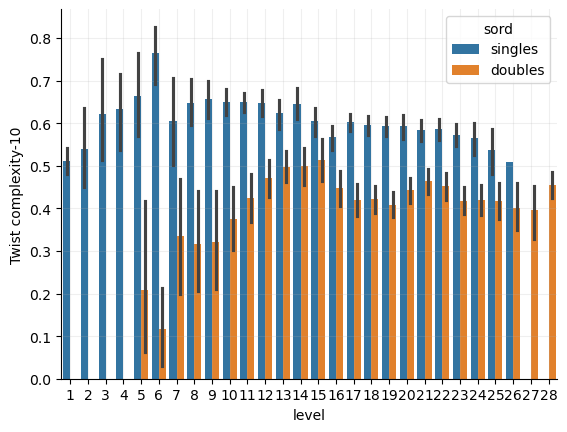

In [153]:
t = 10
c = 2
df[f'Twist complexity-{t}'] = (c * df[f'twistover90-{t}']) / (c * df[f'twistover90-{t}'] + df[f'twist90-{t}'])

sns.barplot(
    x = 'level',
    y = f'Twist complexity-{t}',
    hue = 'sord',
    data = df,
)
sns.despine()
plt.grid(alpha = 0.2)

/tmp/ipykernel_17644/17171805.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


Text(79.84722222222221, 0.5, 'Twist score (highest value in any 10-second window)')

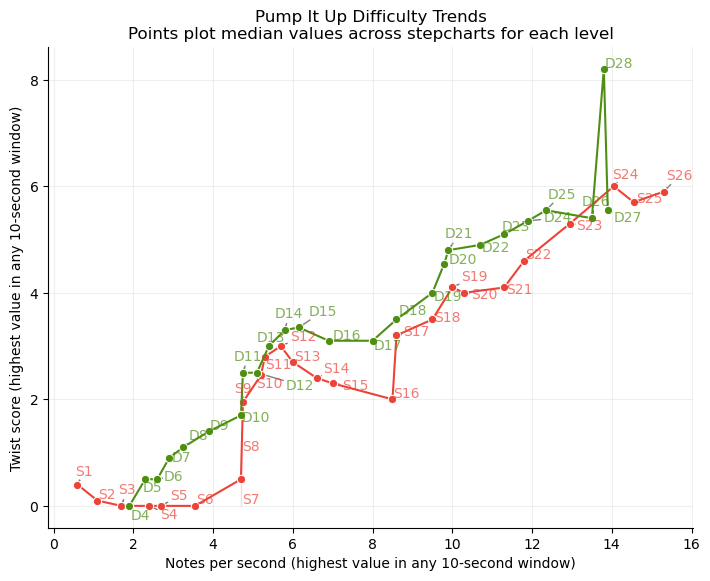

In [159]:
t = 10
df[f'twistscore-{t}'] = df[f'twist90-{t}'] + 2 * df[f'twistover90-{t}']

gdf = df.groupby(['level', 'sord'])[[f'twistscore-{t}', f'edp-{t}']].agg('median').reset_index()

from adjustText import adjust_text

fig, ax = plt.subplots(figsize = (6.4 * 1.3, 4.8 * 1.3))

# pdf = gdf[gdf['sord'] == 'singles']
pdf = gdf.copy()

# fix points with same x axis value
# pdf.loc[(pdf['level'] == 8) & (pdf['sord'] == 'singles'), 'edp-5'] += 0.001
# pdf.loc[(pdf['level'] == 10) & (pdf['sord'] == 'doubles'), 'edp-5'] -= 0.001
# pdf.loc[(pdf['level'] == 17) & (pdf['sord'] == 'singles'), 'edp-5'] += 0.001

palette = {
    'singles': '#ec4339',
    'doubles': '#4e8f13',
}

# sns.scatterplot(
#     data = pdf,
#     x = (x := 'edp-5'),
#     y = (y := 'twistscore-5'),
#     hue = 'sord',
#     palette = palette,
#     ax = ax,
# )
sns.lineplot(
    data = pdf[pdf['sord'] == 'singles'],
    x = (x := f'edp-{t}'),
    y = (y := f'twistscore-{t}'),
    color = palette['singles'],
    marker = 'o',
    # hue = 'sord',
    # palette = palette,
    ax = ax,
)
sns.lineplot(
    data = pdf[pdf['sord'] == 'doubles'],
    x = (x := f'edp-{t}'),
    y = (y := f'twistscore-{t}'),
    color = palette['doubles'],
    marker = 'o',
    # hue = 'sord',
    # palette = palette,
    ax = ax,
)

texts = []
for idx, row in pdf.iterrows():
    sord = row["sord"]
    label = f'{sord[0].upper()}{row["level"]}'
    # ax.annotate(label, (row[x], row[y]))
    texts.append(ax.text(row[x], row[y], label, color = palette[sord], alpha = 0.7))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
ax.legend().remove()

sns.despine()
plt.grid(alpha = 0.2)

plt.title('Pump It Up Difficulty Trends\nPoints plot median values across stepcharts for each level')
plt.xlabel(f'Notes per second (highest value in any {t}-second window)')
plt.ylabel(f'Twist score (highest value in any {t}-second window)')